In [13]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import median
tips = sns.load_dataset('tips')
countries = pd.read_csv('countries-of-the-world.csv')
mpg = pd.read_csv('mpg.csv')
survey_data = pd.read_csv('young-people-survey-responses.csv')
survey_data.columns

Index(['Unnamed: 0', 'Music', 'Techno', 'Movies', 'History', 'Mathematics',
       'Pets', 'Spiders', 'Loneliness', 'Parents' advice', 'Internet usage',
       'Finances', 'Age', 'Siblings', 'Gender', 'Village - town'],
      dtype='object')

In [24]:
survey_data['Parents Advice'] = survey_data["Parents' advice"].dropna()

# 1. Changing plot style and color
So far we've covered how to create a variety of different plot types. Now let's learn how to customize them.

2. Why customize?
By default, Seaborn plots are pleasing to look at, but there are several reasons you may want to change the appearance. Changing the style of a plot can be motivated by personal preference, but it can also help improve its readability or help orient an audience more quickly to the key takeaway.

3. Changing the figure style
Seaborn has five preset figure styles which change the background and axes of the plot. You can refer to them by name: "white", "dark", "whitegrid", "darkgrid", and "ticks". To set one of these as the global style for all of your plots, use the "set style" function.

4. Default figure style ("white")
This is a plot we've seen before, showing the percentage of men reporting that masculinity was important to them, stratified by their age and whether or not they feel masculine. The default style is called "white" and provides clean axes with a solid white background. If we only care about the comparisons between groups or the general trend across age groups instead of the specific values, this is a good choice.

5. Figure style: "whitegrid"
Changing the style to "whitegrid" will add a gray grid in the background. This is useful if you want your audience to be able to determine the specific values of the plotted points instead of making higher level observations.

6. Other styles
The other styles are variants on these. "ticks" is similar to "white", but adds small tick marks to the x- and y-axes.

7. Other styles
"dark" provides a gray background,

8. Other styles
and "darkgrid" provides a gray background with a white grid.

9. Changing the palette
You can change the color of the main elements of the plot with Seaborn's "set palette" function. Seaborn has many preset color palettes that you can refer to by name, or you can create your own custom palette. Let's see an example.

10. Diverging palettes
Seaborn has a group of preset palettes called diverging palettes that are great to use if your visualization deals with a scale where the two ends of the scale are opposites and there is a neutral midpoint. Here are some examples of diverging palettes - red/blue and purple/green. Note that if you append the palette name with "_r", you can reverse the palette.

11. Example (default palette)
To see this in action, let's return to a count plot we've seen before of the responses of men reporting how masculine they feel.

12. Example (diverging palette)
Setting this plot's palette to red/blue diverging provides a clearer contrast between the men who do not feel masculine and the men who do.

13. Sequential palettes
Another group of palettes are called sequential palettes. These are a single color (or two colors blended) moving from light to dark values.

14. Sequential palette example
Sequential palettes are great for emphasizing a variable on a continuous scale. One example is this plot depicting the relationship between a car's horsepower and its miles per gallon, where points grow larger and darker when the car has more cylinders.

15. Custom palettes
You can also create your own custom palettes by passing in a list of color names...

16. Custom palettes
or a list of hex color codes.

17. Changing the scale
Finally, you can change the scale of your plot by using the "set context" function. The scale options from smallest to largest are "paper", "notebook", "talk", and "poster".

18. Default context: "paper"
The default context is "paper".

19. Larger context: "talk"
You'll want to choose a larger scale like "talk" for posters or presentations where the audience is further away from the plot.

20. Let's practice!
Now that we've seen how to change the plot style, palette, and scale, let's practice!

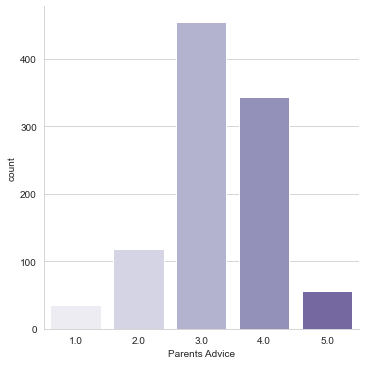

In [26]:
# Set the color palette to "Purples"
sns.set_style("whitegrid")
sns.set_palette("Purples")

# Create a count plot of survey responses


sns.catplot(x="Parents Advice", 
            data=survey_data, 
            kind="count")

# Show plot
plt.show()

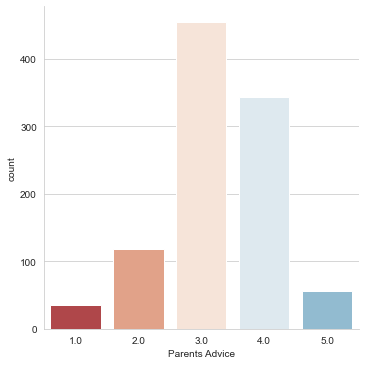

In [27]:
# Set the color palette to "Purples"
sns.set_style("whitegrid")
sns.set_palette("RdBu")

# Create a count plot of survey responses


sns.catplot(x="Parents Advice", 
            data=survey_data, 
            kind="count")

# Show plot
plt.show()

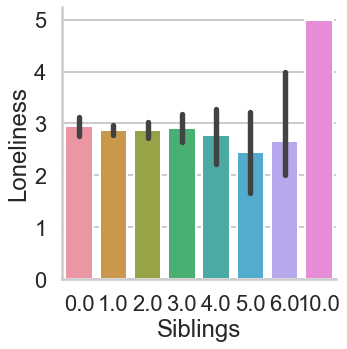

In [32]:
# Set the context to "paper"
sns.set_context("paper")
sns.set_context('notebook')
sns.set_context('talk')
sns.set_context('poster')
# Create bar plot
sns.catplot(x="Siblings", y="Loneliness",
            data=survey_data, kind="bar")

# Show plot
plt.show()

# Using a custom palette
So far, we've looked at several things in the dataset of survey responses from young people, including their internet usage, how often they listen to their parents, and how many of them report feeling lonely. However, one thing we haven't done is a basic summary of the type of people answering this survey, including their age and gender. Providing these basic summaries is always a good practice when dealing with an unfamiliar dataset.

The code provided will create a box plot showing the distribution of ages for male versus female respondents. Let's adjust the code to customize the appearance, this time using a custom color palette.

We've already imported Seaborn as sns and matplotlib.pyplot as plt.

Instructions
0 XP
Set the style to "darkgrid".
Set a custom color palette with the hex color codes "#39A7D0" and "#36ADA4".

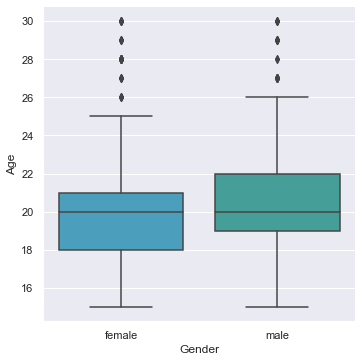

In [34]:
# Set the style to "darkgrid"
sns.set_style("darkgrid")
sns.set_context('notebook')

# Set a custom color palette
sns.set_palette(["#39A7D0", "#36ADA4"])

# Create the box plot of age distribution by gender
sns.catplot(x="Gender", y="Age", 
            data=survey_data, kind="box")

# Show plot
plt.show()

# 1. Adding titles and labels: Part 1
Welcome! In the next two lessons, we'll go over one of the most important parts of any data visualization: plot titles and axis labels.

2. Creating informative visualizations
We create data visualizations to communicate information, and we can't do that effectively without a clear title and informative axis labels. To see this, let's compare two versions of the same visualization. On the left, we see box plots showing the distribution of birth rates for countries in each of 11 regions. On the right, we see the same visualization with three key modifications to make it easier to understand. A title is added, which immediately orients the audience to what they're looking at. The axis labels are more informative, making it clearer that birth rate is measured per one thousand people and birth rates are measured per country in each region. Finally, the x-axis tick labels are rotated to make it clear what each region is called. Let's learn how to make these changes.

3. FacetGrid vs. AxesSubplot objects
Before we go into the details of adding a title, we need to understand an underlying mechanism in Seaborn. Seaborn's plot functions create two different types of objects: FacetGrids and AxesSubplots. To figure out which type of object you're working with, first assign the plot output to a variable. In the documentation, the variable is often named "g", so we'll do that here as well. Write "type" "g" to return the object type. This scatter plot is an AxesSubplot.

4. An Empty FacetGrid
A FacetGrid consists of one or more AxesSubplots, which is how it supports subplots.

5. FacetGrid vs. AxesSubplot objects
Recall that "relplot()" and "catplot()" both support making subplots. This means that they are creating FacetGrid objects. In contrast, single-type plot functions like "scatterplot()" and "countplot()" return a single AxesSubplot object.

6. Adding a title to FacetGrid
Let's return to our messy plot from the beginning. Recall that "catplot()" enables subplots, so it returns a FacetGrid object. To add a title to a FacetGrid object, first assign the plot to the variable "g". After you assign the plot to "g", you can set the title using "g dot fig dot suptitle". This tells Seaborn you want to set a title for the figure as a whole.

7. Adjusting height of title in FacetGrid
Note that by default, the figure title might be a little low. To adjust the height of the title, you can use the "y" parameter. The default value is 1, so setting it to 1 point 03 will make it a little higher than the default.

8. Let's practice!
We'll learn how to add a title to an AxesSubplot object in the next lesson. For now, let's pause and practice what you just learned!

In [ ]:
g - 